# Last.fm User Exploratory Data Analysis

note: explore bivariate analysis between artist's play count and their location but that requires combining location data, maybe look into outliers?, include more interpretations and comment more later to make it more professional

## Setup and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# read in user data
file_path = r'C:\Users\radia\Documents\4th year\w_23\dsc180b_w23\filtered_user_df.csv'
user_df = pd.read_csv(file_path)

In [3]:
# drop unnecessary columns
user_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [4]:
# display data
user_df.head()

,user,artist_name,play_count,artist_url
0,nyancrimew,Jasmine Thompson,7559,https://www.last.fm/music/Jasmine+Thompson
1,nyancrimew,Eminem,5851,https://www.last.fm/music/Eminem
2,nyancrimew,Watsky,3044,https://www.last.fm/music/Watsky
3,nyancrimew,Linkin Park,2938,https://www.last.fm/music/Linkin+Park
4,nyancrimew,twenty one pilots,1849,https://www.last.fm/music/twenty+one+pilots


In [5]:
# basic understanding of dataset
print(f'DataFrame Shape:\n{user_df.shape}\n')

print(f'DataFrame Column Types:\n{user_df.dtypes}\n')

print(f'Number of Missing Values:\n{user_df.isna().sum()}')

DataFrame Shape:
(7682455, 4)

DataFrame Column Types:
user           object
artist_name    object
play_count      int64
artist_url     object
dtype: object

Number of Missing Values:
user           0
artist_name    0
play_count     0
artist_url     0
dtype: int64


## Numerical Analysis

### Play Count

In [6]:
# get summary statistics of play count
user_df['play_count'].describe()

count    7.682455e+06
mean     5.763435e+02
std      2.436419e+03
min      1.000000e+00
25%      6.800000e+01
50%      2.290000e+02
75%      5.880000e+02
max      2.352717e+06
Name: play_count, dtype: float64

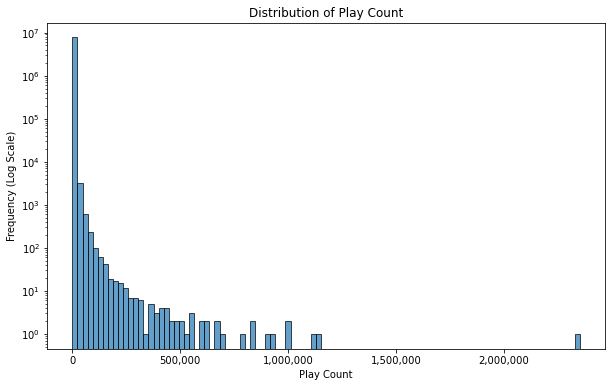

In [7]:
# plot distribution of play count
plt.figure(figsize=(10, 6))
plt.hist(user_df['play_count'], bins=100, edgecolor='k', alpha=0.7)

plt.yscale('log', nonpositive='clip') 

plt.title('Distribution of Play Count')
plt.xlabel('Play Count')
plt.ylabel('Frequency (Log Scale)')

# setting the x-axis to display whole numbers using a custom formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# Categorical Analysis

### User

In [8]:
# get number of unique 
print(f'Number of Unique Users:\n{user_df["user"].nunique()}')

Number of Unique Users:
193707


In [9]:
# dataframe of users by total play count to analyze usage
user_totalplay = user_df.groupby('user')['play_count'].sum().reset_index(name='total_play_count')

In [10]:
# top 10 users
user_totalplay.nlargest(10, 'total_play_count')

,user,total_play_count
170305,shodate76,3714448
72935,Zandhr,2125259
116877,higorrz,2109043
850,AGGAV,1741957
91611,chemkelly,1627015
94853,crs16520,1618729
146505,monarcaladeus,1529169
90823,celestuls,1333451
158650,pixzen,1217551
45620,Morris_Albert_,1198810


In [11]:
# bottom 10 users
user_totalplay.nsmallest(10, 'total_play_count')

,user,total_play_count
236,09-D,1
294,12k,1
647,70x,1
653,77klash,1
1461,AdamKritz7861,1
1473,AdamTudor,1
1538,AdenLie,1
2755,AlienHeroine,1
2933,AllieFWxMD,1
3372,AmrEgy,1


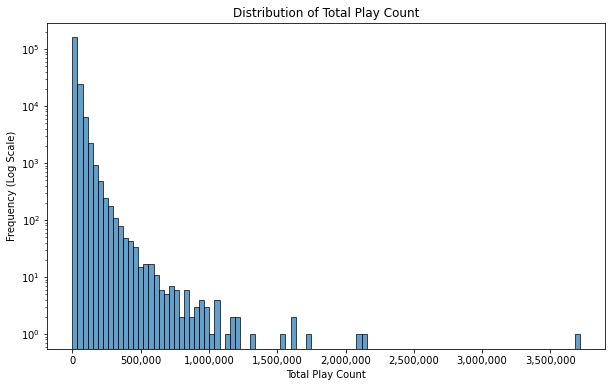

In [12]:
# graph distribution of total play count across users
plt.figure(figsize=(10, 6))
plt.hist(user_totalplay['total_play_count'], bins=100, edgecolor='k', alpha=0.7)

plt.yscale('log', nonpositive='clip') 

plt.title('Distribution of Total Play Count')
plt.xlabel('Total Play Count')
plt.ylabel('Frequency (Log Scale)')

# setting the x-axis to display whole numbers using a custom formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### Artist

In [13]:
# get number of unique artists
print(f'Number of Unique Artists:\n{user_df["artist_name"].nunique()}')

Number of Unique Artists:
97310


In [14]:
# dataframe of artists by total play count to analyze popularity
artist_totalplay = user_df.groupby('artist_name')['play_count'].sum().reset_index(name='total_play_count')

In [15]:
# top 10 artists
artist_totalplay.nlargest(10, 'total_play_count')

,artist_name,total_play_count
64569,Radiohead,41983697
76600,Taylor Swift,34268632
45673,Lady Gaga,32091963
5846,Arctic Monkeys,26447442
45808,Lana Del Rey,25931664
12187,Britney Spears,24100274
55766,Muse,22845764
16649,Coldplay,21327175
53064,Metallica,20587889
47485,Linkin Park,18686664


In [16]:
# bottom 10 artists
artist_totalplay.nlargest(10, 'total_play_count')

,artist_name,total_play_count
64569,Radiohead,41983697
76600,Taylor Swift,34268632
45673,Lady Gaga,32091963
5846,Arctic Monkeys,26447442
45808,Lana Del Rey,25931664
12187,Britney Spears,24100274
55766,Muse,22845764
16649,Coldplay,21327175
53064,Metallica,20587889
47485,Linkin Park,18686664


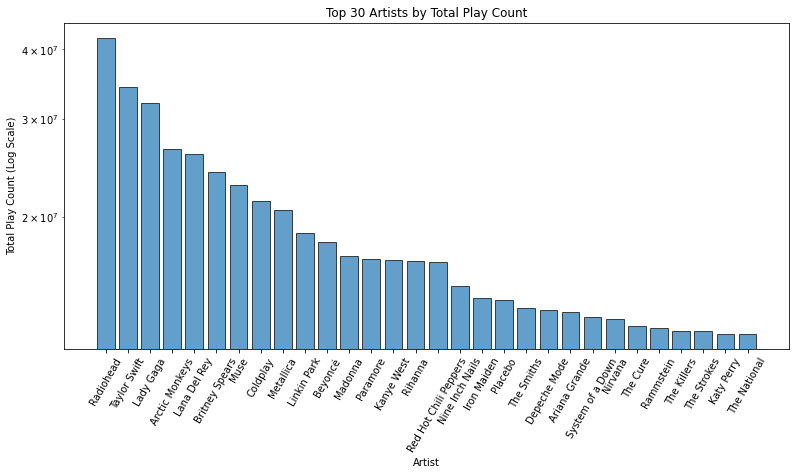

In [17]:
# graph top 30 artists and their total play count
# idk how useful this is so it could be tweaked
top_artists = artist_totalplay.nlargest(30, 'total_play_count')

plt.figure(figsize=(13, 6))
plt.bar(range(len(top_artists['artist_name'])), top_artists['total_play_count'], align='center', edgecolor='k', alpha=0.7)

plt.yscale('log', nonpositive='clip') 

plt.title('Top 30 Artists by Total Play Count')
plt.xlabel('Artist')
plt.ylabel('Total Play Count (Log Scale)')

plt.xticks(range(len(top_artists['artist_name'])), top_artists['artist_name'], rotation=60)

plt.show()

## Bivariate Analysis